An Exploration & Endeavor To Predict Acceptance Probabilities¶
What do the chances for getting accepted into grad school look like for a prospective student?

In this notebook, we will attempt to aswer this question by:

Implementing data visualization techniques
Utilizing Data Cleaning / Features Engineering
Predicting outcomes with a machine learning model
Lets get to it!

In [1]:
#Obvious start, we'll begin with some standard imports for working with data and load the dataset itself:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

**1) Standard Imports and Loading the Dataset**
Obvious start, we'll begin with some standard imports for working with data and load the dataset itself:

In [2]:
# Now loading in data with Pandas
df = pd.read_csv('../input/Admission_Predict.csv')

print('dataframe shape: {}'.format(df.shape))
df.head(3)

dataframe shape: (400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [3]:
# Now getting a better look at what each column represents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


So we're off to a good and clear start. Here is what we can tell so far:

Data Shape: By looking at the first few entries and dataframe shape, we can see that we are working with 400 entries, each one with 9 features.
Feature Data Types: All of our features are numerical, meaning they are quantified measurements which we can perform mathematical operations on without doing any kind of special conversion.
Amount of Data: As we just mentioned, we have only 400 entries, and this is important to take note. It means that when it comes time to implement some machine learning model, we should avoid neural networks. Why? Neural networks only start to work well with large datasets (at least a few thousand entries), and our 400 entries now won't cut it. We will have to work with more traditional techniques to see good results
Great! Before we can go into some further data exploration and begin visualization techniques, lets do a little housekeeping:

**2) Basic Data Cleaning**
We haven't looked too closely at the data yet to get involved in faeatures engineering, but we can already start with some items that will make our life easier. Right off the bat, this is what we can do:

Get rid of the 'Serial No.' Column, as it only serves the purpose of identifying entries and would not contribute to data exploration/visualization/predicitons
Standardize the column names, for ease of access. We will go ahead and use snake_case. Also, uncommon acronyms will be replaced for their meaning (like 'LOR' for 'Letter of Recommendation'), but keep common ones, like GPA

In [4]:
# Dropping 'Serial No.'
df = df.drop(columns=['Serial No.'])

In [5]:
# Standardizing column names
df.columns = ['GRE_score', 'TOEFL_score', 'university_rating', 'statement_of_purpose', 'letter_of_recommendation', 'GPA', 'research', 'chance_of_admit']

Again, lets take a look at our first three entries. We should now only see the Serial No. column gone and the columns renamed:

In [6]:
df.head(3)

,GRE_score,TOEFL_score,university_rating,statement_of_purpose,letter_of_recommendation,GPA,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


Awesome! Lets move on to some further exploration and visualization

3) Data Exploration / Visualization
Acceptance Distributions
First things first, lets take a quick look at the distribution of acceptance probabilites across our dataset. For this, we will ceate a histogram

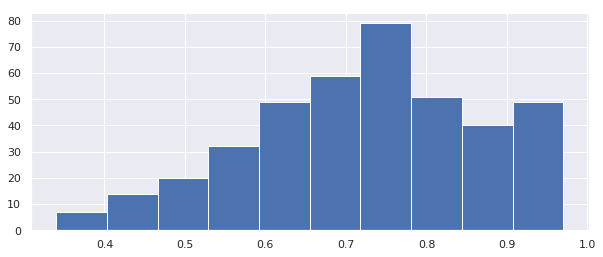

In [7]:
df['chance_of_admit'].hist(figsize=(10,4))

Here we can see that it roughly follows a normal (gaussian ditribution), skewed to the left.

We can confirm our observation by using a density plot

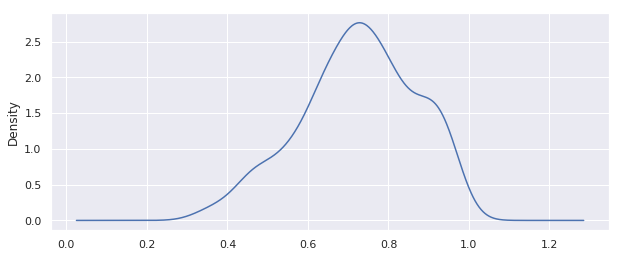

In [8]:
df['chance_of_admit'].plot(kind='density', subplots=True, figsize=(10, 4));

What does this mean? It means that for most of our data entries, our distribution leans to most of them having higher probabilities of grad school acceptance.

This could pose a problem in our analysis and any future predictions because of a possible bias in a test set. Our bias could potentially be that we give candidates a higher probability score than what it actually should be.

However, given the current dataset, we cannot extrapolate to what a healthy and realistic distribution would look like. We will continue working with the probabilites at hand, but also keep this potential bias problem on our minds.

**Correlations**
Since we're dealing with only a few number of features, lets implement a correlation matrix. A correlation matrix is great to get a high level view of our features and any possible relationships between them:

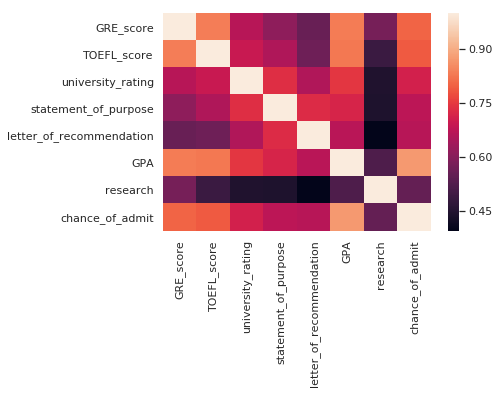

In [9]:
# Creating a correlation matrix:
corr_matrix = df.corr()
# Plotting heatmap
sns.heatmap(corr_matrix);

The heatmap allows us to note the stronger correlations by lighter-colored tiles.

We can see that chance_ofadmit, GRE_score, TOEFL_score, and GPA, are closely related. If one of these move in a certain direction (increase or decrease in value), it is very likely that the other features will follow in that direction.

Higher University scores also seem to influence chance_of_admit, but not as much as GPAs and test scores.

Interestingly, we note that research seems to be weakly correlated with our chance_of_admit. Its important to remember that this is binary value, with 1 representing experience in research, while 0 represents no experience. Soon, we will take a closer look and see how they add up.

Quantitative Relationships w/ Scatter Plots
We can spend all day looking deeper into certain data relationships, but we'll keep our current analysis only down to a few.

The strongest relationship we noted in the correlation matrix for chance_of_admit was with GPA. Lets start there.

We will use a jointplot, which will mainly display a scatterplot for our correlation, but also contain a distribution of each feature above its respected axis:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


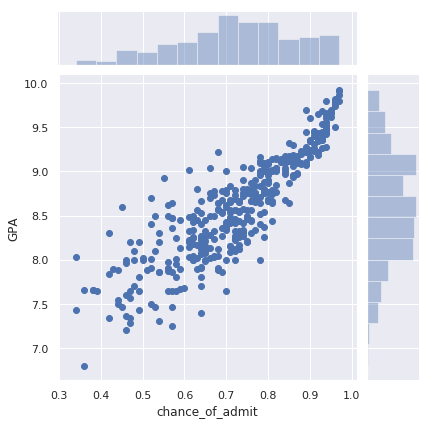

In [10]:
sns.jointplot(x='chance_of_admit', y='GPA', data=df, kind='scatter');

As noted before,we see the correlation that as GPA increases, so does chance_of_admit. We also can see the distribution for columns. GPA seems to follow a more standard Gaussian distribution than chance_of_admit, and it is not as skewed.

But this one seems quite obvious. What about that tricker relationship, regarding research? Lets take a look at it now

**Quantitative-Cateogrical Analysis with Research and Acceptance**
We just used a scatter plot to visualize the relationship between GPA and chance_of_admit. But how about research? Here we implement the same scatterplot visualization, but we discriminate them by research status

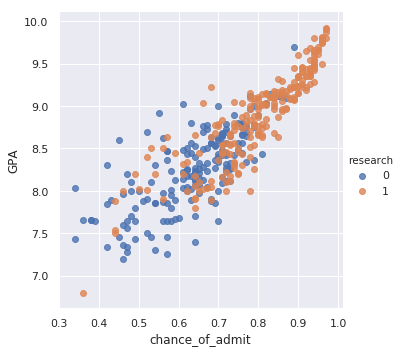

In [11]:
sns.lmplot('chance_of_admit', 'GPA', data=df, hue='research', fit_reg=False);

Interesting! Based on our new findings, we can see that almost all candidates with higher chances of admission have participated in research work.

This is a great example of needing to use various visualization tools to get a better understanding of our data. If we only had relied on the correlation matrix, we would have concluded that research would not have mattered for grad school acceptance.

We've achieved our basic goal of data exploration and visualization. Its always a good idea to look further and do more visualizations, but we will stop for now and move on to seeing how we can predict acceptance probabilities for candidates

4) Building a Machine Learning Model for Acceptance Predictions
Time for everyone's favorite part, machine learning!

Before we go crazy throwing all kinds of ml models at the problem, let's break down what exactly we are trying to do here:

Given all features, given chance_of_admit, predict the percentage of chance_of_admit

From our problem statement, we can identidy the following:

Predicting based on an already given label is a supervised learning problem
Predicting based on a percentage can be modeled as a regression problem
This makes our initial endeavor into ML for this dataset straightforward: We will begin with a simple linear regression model to predict chance of admission.

A Note on Picking ML Models
Some might scoff at picking to use such a simple model to predict acceptance rates.

While linear regression is one of the simplest models available for implementation, it is also quite effective and has a fast iteration cycle. Part of our job as machine learning engineers and data scientists is to work with iteration.

You could begin with a more complicated model, such as a Support Vector Machine, but configuration is not as straight forward, and you won't have a universal baseline of performance.

Linear Regression is so widely used, that it serves as a stronger baseline of how effectively you can make predictions. With time, we can iterate and implement more complex models and analyze the improvements that may come with them.

Importing sklearn || Seperating our Feature Inputs and Target
To implement linear regression, we will import the existing function from scikit learn, one of the landmark libraries for data science programming in Python. We will also go ahead and import metrics, which will allow us to quantify our predictions based on their actual results.

In [12]:
# taking care of our ML imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

It is common to denote our features by X, and our target variable as y. We will follow this common notation here when creating our training set

In [13]:
# Seperating our features and our target.
train_features = list(set(df.columns) - set(['chance_of_admit']))

train_X = df[train_features]
train_y = df['chance_of_admit']

Initializing and Training our Regression Model¶
Now that our training set has been properly allocated, we can actually create an instance of our model and begin training!

In [14]:
# Create LinearRegression instance
linear_regression = LinearRegression()

# Begin training! This is also knows as 'fitting' the model to our data
linear_regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Analyzing Coefficients
Now that it has been trained, we can see how heavily each feature influenced our linear regression model. This will be good insight to se understand whats happening under the hood:

In [15]:
pd.DataFrame(linear_regression.coef_, train_X.columns, columns=['Coefficient'])

,Coefficient
GPA,0.118939
university_rating,0.005717
GRE_score,0.001737
letter_of_recommendation,0.022353
research,0.024525
statement_of_purpose,-0.003305
TOEFL_score,0.002920


As we can see, GPA was the most influential factor for our linear regression model, with research coming in second.

Its also interesting to see that GPA outweighs all the other features, by almost as much as 5 times compared to research.

Now that the model has been fitted, lets evaluate it with our test set

5) Evaluating our Model
Evaluation is crucial to measure the performance of our regression model. For this we need two things:

A test set
A criterion, also known as a loss function
For our test set, we will load that in as it has already been prepared. For the criterion, we will use the MAE (Mean Absolute Error) Loss Function.

Test Set Loading & Formatting

In [16]:
# Loading in Test set
test_df = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')

test_df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


For the sake of consistency, we will convert our column names for the test dataframe and drop Serial No..

In [17]:
test_df = test_df.drop(columns=['Serial No.'])
test_df.columns = ['GRE_score', 'TOEFL_score', 'university_rating', 'statement_of_purpose', 'letter_of_recommendation', 'GPA', 'research', 'chance_of_admit']

In [18]:
test_df.head(3)

,GRE_score,TOEFL_score,university_rating,statement_of_purpose,letter_of_recommendation,GPA,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


Now we've followed the same structure as our training data

Test Formatting, Evaluation Score¶
We set up our test and run the model



In [19]:
test_X = test_df[train_features]
test_y = test_df['chance_of_admit']

In [20]:
y_pred = linear_regression.predict(test_X)

In [21]:
accuracy=linear_regression.score(train_X,train_y)
print ("accuracy =",accuracy)

accuracy = 0.8034713719824393


here we got a accuracy of 80% when we used linear regression

Before using our actual loss function, lets take a manual look of how our predictions compare to the actual results

In [22]:
pd.DataFrame({'Prediction': y_pred, 'Actual': test_y}).head(10)

,Prediction,Actual
0,0.951459,0.92
1,0.805637,0.76
2,0.654737,0.72
3,0.738362,0.80
4,0.635206,0.65
5,0.865854,0.90
6,0.712986,0.75
7,0.601120,0.68
8,0.547214,0.50
9,0.712586,0.45


We can see that our model is making reasonable assumptions about admission rates! While not perfect, this is a good first step with a linear regression model.

Let's finally take an accurate score with the Mean Absolute Error

In [23]:
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(test_y, y_pred)))


Mean Absolute Error: 0.042843537799823014
